In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['y'])

# # 学習データとテストデータに分割
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = X
y_train = y

#RandamForestの学習済みモデルを用意する。
clf = RandomForestClassifier().fit(X_train, y_train)
clf = DecisionTreeClassifier().fit(X_train, y_train)

y_train.head()  # 1番目のデータの予測結果はsetosa

,y
0,0
1,0
2,0
3,0
4,0


# TreeExplainer

In [4]:
#SHAPのExplainerを用意する。ランダムフォレストなのでTreeExplainerを使う。
explainer = shap.TreeExplainer(clf)
 
#irisの最初のデータを例にshap_valuesを求める。
shap_values = explainer.shap_values(X_train.loc[[0]])
 
#予測に使ったデータに対してsetosaとなる確率とその要因について可視化する。
shap.force_plot(explainer.expected_value[0], 
                shap_values[0], 
                X_train.loc[[0]], 
                matplotlib=True,
                )

Exception: Model type not yet supported by TreeExplainer: <class 'sklearn.tree._classes.DecisionTreeClassifier'>

# summary_plot

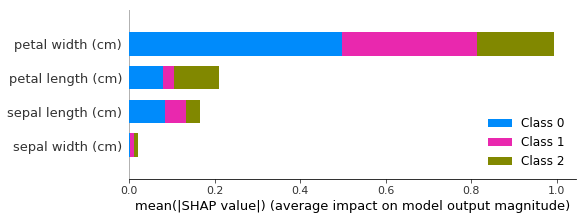

In [3]:
shap.summary_plot(shap_values, features=X_train, plot_type="bar")

# KernelExplainer

Using 150 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


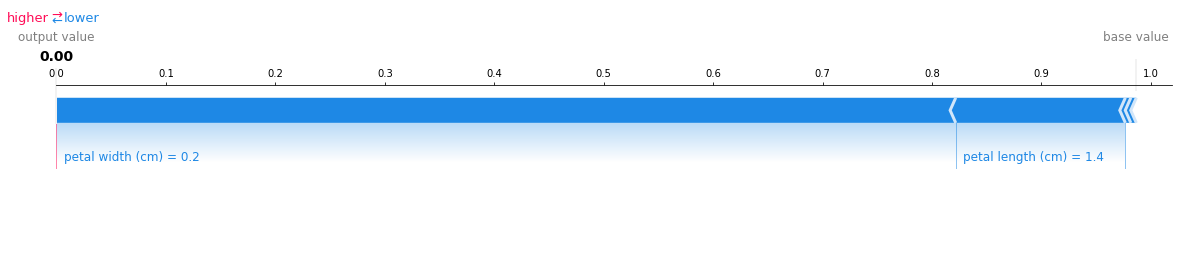

In [4]:
#SHAPのExplainerを用意する。SVCなのでKernelExplainerを使う。
explainer = shap.KernelExplainer(clf.predict, X_train)
 
#irisの最初のデータを例にshap_valuesを求める。
shap_values = explainer.shap_values(X_train.loc[[0]])
 
#予測に使ったデータに対して出力とその要因について可視化する。
shap.force_plot(explainer.expected_value, 
                shap_values, 
                X_train.loc[[0]], 
                matplotlib=True,
                )

# summary_plot

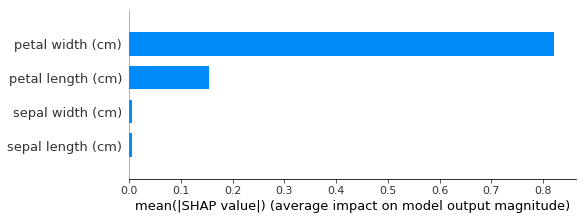

In [5]:
shap.summary_plot(shap_values, features=X_train, plot_type="bar")

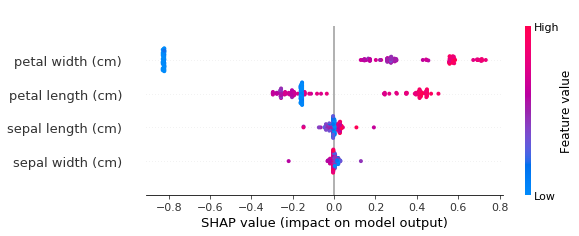

In [6]:
#irisの全データを例にshap_valuesを求める。
shap_values = explainer.shap_values(X_train)
#summary_plotを実行
shap.summary_plot(shap_values, 
                  features=X_train, 
                  class_names=['setosa', 'versicolor', 'virginica'],
                  plot_type="dot",
                  )

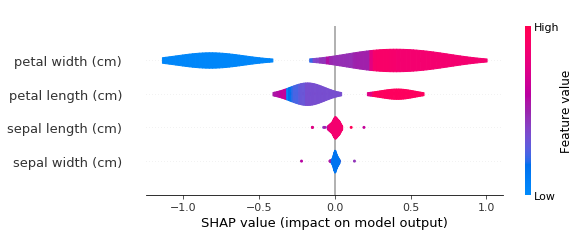

In [7]:
shap.summary_plot(shap_values, 
                  features=X_train, 
                  class_names=['setosa', 'versicolor', 'virginica'],
                  plot_type="violin",
                  )

# dependence_plot

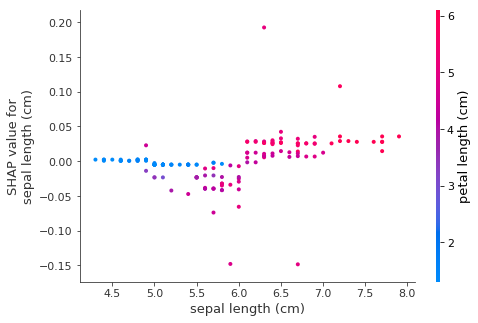

In [8]:
#irisの全データを対象にshap_valuesを求める。
shap_values = explainer.shap_values(X_train)
#dependence_plotを実行
shap.dependence_plot('sepal length (cm)', 
                     shap_values, 
                     features=X_train
                     )

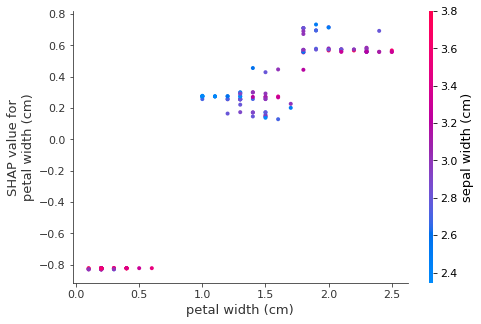

In [9]:
#irisの全データを対象にshap_valuesを求める。
shap_values = explainer.shap_values(X_train)
#dependence_plotを実行
shap.dependence_plot('petal width (cm)', 
                     shap_values, 
                     features=X_train
                     )

# force_plot

In [10]:
shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values, features=X_train)